In [2]:
!pip install PyQt5

   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ------ --------------------------------- 1.0/6.9 MB 7.8 MB/s eta 0:00:01
   ------------------ --------------------- 3.1/6.9 MB 8.2 MB/s eta 0:00:01
   ----------------------------- ---------- 5.0/6.9 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------  6.8/6.9 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 6.9/6.9 MB 8.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/50.1 MB ? eta -:--:--
   - -------------------------------------- 1.8/50.1 MB 9.0 MB/s eta 0:00:06
   -- ------------------------------------- 3.7/50.1 MB 9.1 MB/s eta 0:00:06
   ---- ----------------------------------- 5.5/50.1 MB 8.8 MB/s eta 0:00:06
   ----- ---------------------------------- 7.1/50.1 MB 8.5 MB/s eta 0:00:06
   ------- -------------------------------- 8.9/50.1 MB 8.6 MB/s eta 0:00:05
   -------- ------------------------------- 11.0/50.1 MB 8.6 MB/s eta 0:00:05
   ---------- ----

In [5]:
from __future__ import print_function

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
import argparse
import anogan_mnist

ModuleNotFoundError: No module named 'cv2'

In [ ]:
import matplotlib
matplotlib.use('Qt5Agg')

In [5]:
import tensorflow as tf

In [6]:
## 0. prepare data

import os 
import cv2

import numpy as np
import matplotlib.pyplot as plt


path = '/content/drive/MyDrive/smoke_free_image'

#Two empty lists initialised for storing the images and labels from Covid- 19 and normal images folders

X = []
y = []

img_list = os.listdir(path)
img_list=img_list[:5000]

# import pdb;pdb.set_trace()
for img in img_list:
    image = cv2.imread(os.path.join(path,img), 0)
    image = cv2.resize(image,(28,28))
    
#Appending the images to the created list
    X.append(image)
    y.append(1)


In [7]:
### 0. prepare data
#(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
from keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import tensorflow.keras as K

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 100)

X_train = np.array(X_train)[:,:,:,None]
X_test = np.array(X_test)[:,:,:,None]

X_train = (X_train.astype(np.float32) - 127.5) / 127.5
X_test = (X_test.astype(np.float32) - 127.5) / 127.5



X_test_original = X_test.copy()

#X_train = X_train[y_train==1]
#X_test = X_test[y_test==1]
print ('train shape:', X_train.shape)



train shape: (4000, 28, 28, 1)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch is 0
61/62 [============================>.] - ETA: 0s - g: 8.0575e-04 - d: 0.0423
Epoch is 1
61/62 [============================>.] - ETA: 0s - g: 3.3226e-09 - d: 6.1375e-05
Epoch is 2
61/62 [============================>.] - ETA: 0s - g: 3.3657e-06 - d: 2.7769e-06
Epoch is 3
61/62 [============================>.] - ETA: 0s - g: 1.0744e-17 - d: 4.6853e-08
Epoch is 4
61/62 [============================>.] - ETA: 0s - g: 2.9475e-15 - d: 1.8988e-08
Epoch is 5
61/62 [============================>.] - ETA: 0s - g: 7.0792e-10 - d: 2.4385e-08
Epoch is 6
61/62 [============================>.] - ETA: 0s - g: 3.0776e-05 - d: 1.9057e-05
Epoch is 7
61/62 [============================>.] - ETA: 0s - g: 0.0502 - d: 0.0072
Epoch is 8
61/62 [============================>.] - ETA: 0s - g: 0.6862 - d: 0.0571
Epoch is 9
61/62 [============================>.] - ETA: 0s - g: 0.7524 - d: 0.1825
Epoch is 10
61/62 [============================>.] - ETA: 0s - g: 1.4381e-10 - d: 0.5002
Epoch is 11
61/62 [

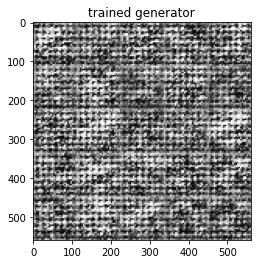

In [8]:
if True:
    Model_d, Model_g = anogan_mnist.train(64, X_train)

### 2. test generator
generated_img = anogan_mnist.generate(25)
img = anogan_mnist.combine_images(generated_img)
img = (img*127.5)+127.5
img = img.astype(np.uint8)
img = cv2.resize(img, None, fx=4, fy=4, interpolation=cv2.INTER_NEAREST)

### opencv view
# cv2.namedWindow('generated', 0)
# cv2.resizeWindow('generated', 256, 256)
# cv2.imshow('generated', img)
# cv2.imwrite('result_latent_10/generator.png', img)
# cv2.waitKey()

### plt view
plt.figure(num=0, figsize=(4, 4))
plt.title('trained generator')
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

# exit()

### 3. other class anomaly detection

/usr/local/lib/python3.7/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


anomaly score :  337.3476257324219


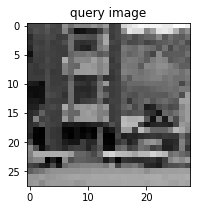

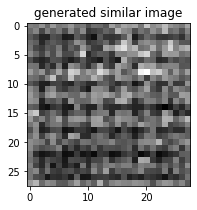

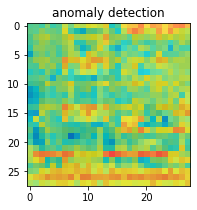

In [9]:
def anomaly_detection(test_img, g=None, d=None):
    model = anogan_mnist.anomaly_detector(g=g, d=d)
    ano_score, similar_img = anogan_mnist.compute_anomaly_score(model, test_img.reshape(1, 28, 28, 1), iterations=500, d=d)

    # anomaly area, 255 normalization
    np_residual = test_img.reshape(28,28,1) - similar_img.reshape(28,28,1)
    np_residual = (np_residual + 2)/4

    np_residual = (255*np_residual).astype(np.uint8)
    original_x = (test_img.reshape(28,28,1)*127.5+127.5).astype(np.uint8)
    similar_x = (similar_img.reshape(28,28,1)*127.5+127.5).astype(np.uint8)

    original_x_color = cv2.cvtColor(original_x, cv2.COLOR_GRAY2BGR)
    residual_color = cv2.applyColorMap(np_residual, cv2.COLORMAP_JET)
    show = cv2.addWeighted(original_x_color, 0.3, residual_color, 0.7, 0.)

    return ano_score, original_x, similar_x, show


### compute anomaly score - sample from test set
# test_img = X_test_original[y_test==1][30]

### compute anomaly score - sample from strange image
test_img = X_test_original[30]

### compute anomaly score - sample from strange image
#img_idx = args.img_idx
#label_idx = args.label_idx
#test_img = X_test_original[y_test==label_idx][img_idx]
# test_img = np.random.uniform(-1,1, (28,28,1))

start = cv2.getTickCount()
score, qurey, pred, diff = anomaly_detection(test_img)
time = (cv2.getTickCount() - start) / cv2.getTickFrequency() * 1000
#print ('%d label, %d : done'%(label_idx, img_idx), '%.2f'%score, '%.2fms'%time)
# cv2.imwrite('./qurey.png', qurey)
# cv2.imwrite('./pred.png', pred)
# cv2.imwrite('./diff.png', diff)

## matplot view
plt.figure(1, figsize=(3, 3))
plt.title('query image')
plt.imshow(qurey.reshape(28,28), cmap=plt.cm.gray)

print("anomaly score : ", score)
plt.figure(2, figsize=(3, 3))
plt.title('generated similar image')
plt.imshow(pred.reshape(28,28), cmap=plt.cm.gray)

plt.figure(3, figsize=(3, 3))
plt.title('anomaly detection')
plt.imshow(cv2.cvtColor(diff,cv2.COLOR_BGR2RGB))
plt.show()



/usr/local/lib/python3.7/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


anomaly score :  152.12684631347656


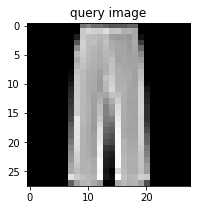

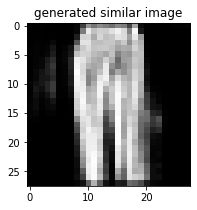

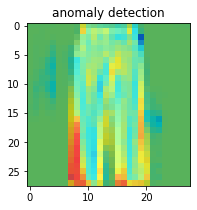

In [9]:
def anomaly_detection(test_img, g=None, d=None):
    model = anogan_mnist.anomaly_detector(g=g, d=d)
    ano_score, similar_img = anogan_mnist.compute_anomaly_score(model, test_img.reshape(1, 28, 28, 1), iterations=500, d=d)

    # anomaly area, 255 normalization
    np_residual = test_img.reshape(28,28,1) - similar_img.reshape(28,28,1)
    np_residual = (np_residual + 2)/4

    np_residual = (255*np_residual).astype(np.uint8)
    original_x = (test_img.reshape(28,28,1)*127.5+127.5).astype(np.uint8)
    similar_x = (similar_img.reshape(28,28,1)*127.5+127.5).astype(np.uint8)

    original_x_color = cv2.cvtColor(original_x, cv2.COLOR_GRAY2BGR)
    residual_color = cv2.applyColorMap(np_residual, cv2.COLORMAP_JET)
    show = cv2.addWeighted(original_x_color, 0.3, residual_color, 0.7, 0.)

    return ano_score, original_x, similar_x, show


### compute anomaly score - sample from test set
test_img = X_test_original[y_test==1][30]

### compute anomaly score - sample from strange image
#test_img = X_test_original[y_test==0][30]

### compute anomaly score - sample from strange image
#img_idx = args.img_idx
#label_idx = args.label_idx
#test_img = X_test_original[y_test==label_idx][img_idx]
# test_img = np.random.uniform(-1,1, (28,28,1))

start = cv2.getTickCount()
score, qurey, pred, diff = anomaly_detection(test_img)
time = (cv2.getTickCount() - start) / cv2.getTickFrequency() * 1000
#print ('%d label, %d : done'%(label_idx, img_idx), '%.2f'%score, '%.2fms'%time)
# cv2.imwrite('./qurey.png', qurey)
# cv2.imwrite('./pred.png', pred)
# cv2.imwrite('./diff.png', diff)

## matplot view
plt.figure(1, figsize=(3, 3))
plt.title('query image')
plt.imshow(qurey.reshape(28,28), cmap=plt.cm.gray)

print("anomaly score : ", score)
plt.figure(2, figsize=(3, 3))
plt.title('generated similar image')
plt.imshow(pred.reshape(28,28), cmap=plt.cm.gray)

plt.figure(3, figsize=(3, 3))
plt.title('anomaly detection')
plt.imshow(cv2.cvtColor(diff,cv2.COLOR_BGR2RGB))
plt.show()

/usr/local/lib/python3.7/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


anomaly score :  194.74391174316406


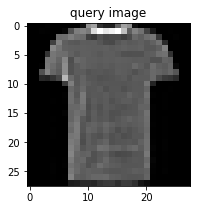

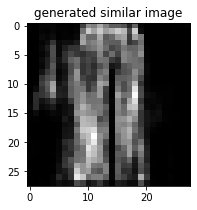

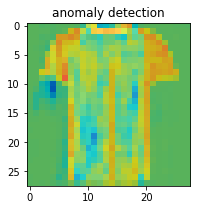

In [11]:
def anomaly_detection(test_img, g=None, d=None):
    model = anogan_mnist.anomaly_detector(g=g, d=d)
    ano_score, similar_img = anogan_mnist.compute_anomaly_score(model, test_img.reshape(1, 28, 28, 1), iterations=500, d=d)

    # anomaly area, 255 normalization
    np_residual = test_img.reshape(28,28,1) - similar_img.reshape(28,28,1)
    np_residual = (np_residual + 2)/4

    np_residual = (255*np_residual).astype(np.uint8)
    original_x = (test_img.reshape(28,28,1)*127.5+127.5).astype(np.uint8)
    similar_x = (similar_img.reshape(28,28,1)*127.5+127.5).astype(np.uint8)

    original_x_color = cv2.cvtColor(original_x, cv2.COLOR_GRAY2BGR)
    residual_color = cv2.applyColorMap(np_residual, cv2.COLORMAP_JET)
    show = cv2.addWeighted(original_x_color, 0.3, residual_color, 0.7, 0.)

    return ano_score, original_x, similar_x, show


### compute anomaly score - sample from test set
# test_img = X_test_original[y_test==1][30]

### compute anomaly score - sample from strange image
test_img = X_test_original[y_test==0][200]

### compute anomaly score - sample from strange image
#img_idx = args.img_idx
#label_idx = args.label_idx
#test_img = X_test_original[y_test==label_idx][img_idx]
# test_img = np.random.uniform(-1,1, (28,28,1))

start = cv2.getTickCount()
score, qurey, pred, diff = anomaly_detection(test_img)
time = (cv2.getTickCount() - start) / cv2.getTickFrequency() * 1000
#print ('%d label, %d : done'%(label_idx, img_idx), '%.2f'%score, '%.2fms'%time)
# cv2.imwrite('./qurey.png', qurey)
# cv2.imwrite('./pred.png', pred)
# cv2.imwrite('./diff.png', diff)

## matplot view
plt.figure(1, figsize=(3, 3))
plt.title('query image')
plt.imshow(qurey.reshape(28,28), cmap=plt.cm.gray)

print("anomaly score : ", score)
plt.figure(2, figsize=(3, 3))
plt.title('generated similar image')
plt.imshow(pred.reshape(28,28), cmap=plt.cm.gray)

plt.figure(3, figsize=(3, 3))
plt.title('anomaly detection')
plt.imshow(cv2.cvtColor(diff,cv2.COLOR_BGR2RGB))
plt.show()